## Data Loading

In [2]:
# import the necessary libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost import XGBClassifier

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Libraries for measuring classifier performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [143]:
#print all the rows from test data
data1=pd.read_csv(r'C:\Users\MAJIDU\Downloads\MEELMMPI.csv')
data2=pd.read_csv(r'C:\Users\MAJIDU\Downloads\MEELJUD.csv')
data2['mos'] = np.mean(data2, axis=1)
result=pd.concat([data1,data2],axis=1)

we can see test data only contains 5 rows

Text(0.5, 1.0, 'Distribution of Target Label (i.e. Class)')

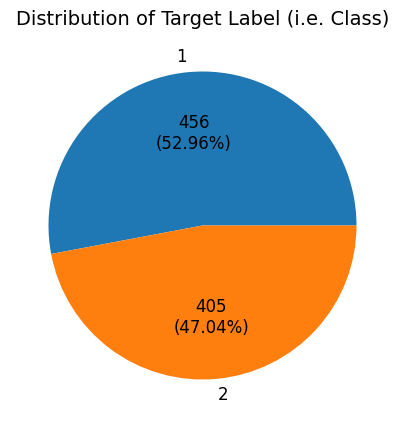

In [5]:

plt.figure(figsize=(5,5))

def auto_fmt (pct_value):
    return '{:.0f}\n({:.2f}%)'.format(result['criterion'].value_counts().sum()*pct_value/100,pct_value) 

df_transported_count = result['criterion'].value_counts().rename_axis('Class').reset_index(name='Counts')

fig = plt.gcf()
plt.pie(x=df_transported_count['Counts'], labels=df_transported_count['Class'], autopct=auto_fmt, textprops={'fontsize': 12})
plt.title('Distribution of Target Label (i.e. Class)',  fontsize = 14)

We can see we don't have an imbalanced dataset.

### Data preproccesing

#### check for null values in the train set

In [7]:
columns_with_null = result.columns[result.isnull().any()]

null_count = result[columns_with_null].isnull().sum()

# Print columns with null values and their corresponding null counts
for column in columns_with_null:
    print(f"Column '{column}': {null_count[column]} null value(s)")

In [8]:
result.isnull().sum()

S1           0
S2           0
S3           0
S4           0
S5           0
S6           0
S7           0
S8           0
S9           0
S10          0
S11          0
criterion    0
J1           0
J2           0
J3           0
J4           0
J5           0
J6           0
J7           0
J8           0
J9           0
J10          0
J11          0
J12          0
J13          0
J14          0
J15          0
J16          0
J17          0
J18          0
J19          0
J20          0
J21          0
J22          0
J23          0
J24          0
J25          0
J26          0
J27          0
J28          0
J29          0
SAMPLE       0
dtype: int64

we can see that there are no columns that contain null values.

now we can see, there is no missing value in our train data

In [159]:
#drop the Id column
X=result[['S1','S2','S3','S4','S5','S6','S7',
          'S8','S9','mos']]
y=result.criterion

In [164]:
y = y.replace({1: 0, 2: 1})

lets all also do the same for test set as well

no null values in test set

### applying ML algorithms

In [148]:
# function to train different Machine learning models

def ML_algo(model):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
    Scaler_X = StandardScaler()
    X_train = Scaler_X.fit_transform(X_train)
    X_test = Scaler_X.transform(X_test) 

    model=model()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)


    # visualzie the model performance using confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y)
    display_labels = [str(label) for label in labels]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Define and print various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


we will use the following models:

1. Logistic regression

2. Random Forest

3. LightGBM

4. XGBOOST

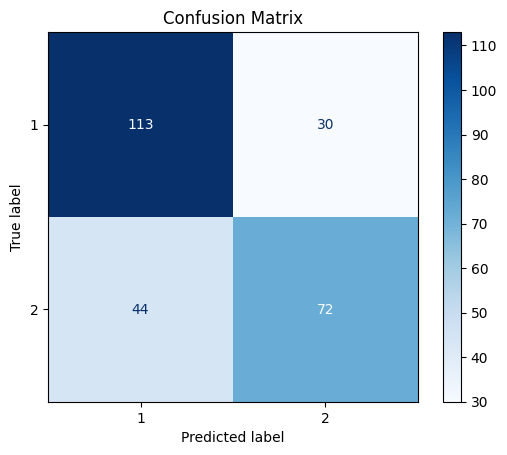

Accuracy: 0.7142857142857143
Precision: 0.7197452229299363
Recall: 0.7902097902097902
F1 Score: 0.7533333333333333


In [160]:
# Logistic Regression
ML_algo(LogisticRegression)

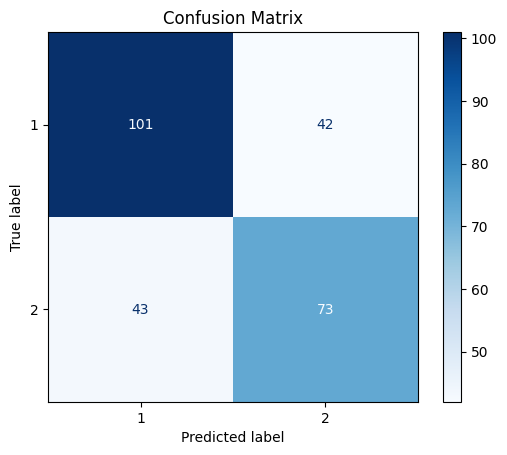

Accuracy: 0.6718146718146718
Precision: 0.7013888888888888
Recall: 0.7062937062937062
F1 Score: 0.7038327526132404


In [161]:
#Random Forest
ML_algo(RandomForestClassifier)

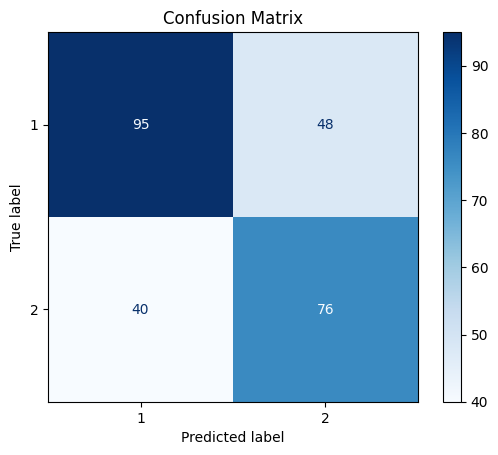

Accuracy: 0.6602316602316602
Precision: 0.7037037037037037
Recall: 0.6643356643356644
F1 Score: 0.683453237410072


In [162]:
ML_algo(lgb.LGBMClassifier)

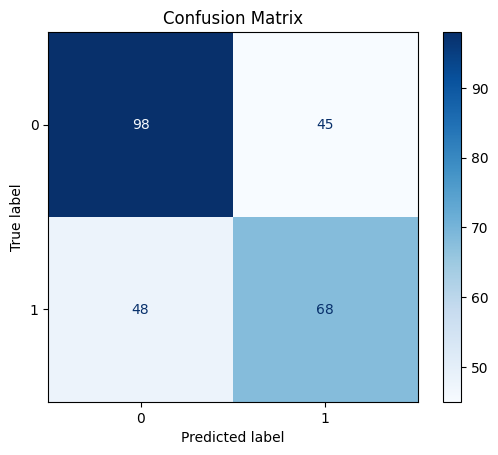

Accuracy: 0.640926640926641
Precision: 0.6017699115044248
Recall: 0.5862068965517241
F1 Score: 0.593886462882096


In [165]:
ML_algo(XGBClassifier)

### Hyperparamter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(X, y, model, param_grid, cv=5):
    grid_search = GridSearchCV(model, param_grid, cv=cv)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    cv_results = grid_search.cv_results_
    
    return best_params, best_score, cv_results


In [49]:
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_best_params, rf_best_score, rf_cv_results = perform_grid_search(X, y, rf_model, rf_param_grid)

# Print results for each classifier
print("RandomForestClassifier - Best Parameters:", rf_best_params)
print("RandomForestClassifier - Best Score:", rf_best_score)
#print("RandomForestClassifier - CV Results:", rf_cv_results)




RandomForestClassifier - Best Parameters: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestClassifier - Best Score: 0.6782766500873774


In [50]:
# LightGBM
lgbm_model = lgb.LGBMClassifier()
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
lgbm_best_params, lgbm_best_score, lgbm_cv_results = perform_grid_search(X, y, lgbm_model, lgbm_param_grid)

print("LightGBM - Best Parameters:", lgbm_best_params)
print("LightGBM - Best Score:", lgbm_best_score)
#print("LightGBM - CV Results:", lgbm_cv_results)


LightGBM - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
LightGBM - Best Score: 0.6655061164134966


In [51]:
# XGBoost
xgb_model = XGBClassifier()
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_best_params, xgb_best_score, xgb_cv_results = perform_grid_search(X, y, xgb_model, xgb_param_grid)

print("XGBoost - Best Parameters:", xgb_best_params)
print("XGBoost - Best Score:", xgb_best_score)
#print("XGBoost - CV Results:", xgb_cv_results)

XGBoost - Best Parameters: {'learning_rate': 0.01, 'max_depth': 5}
XGBoost - Best Score: 0.6504503293453421


### Models with HyperParamter tuning

We will leave logistic regression for this part

### Random Forest

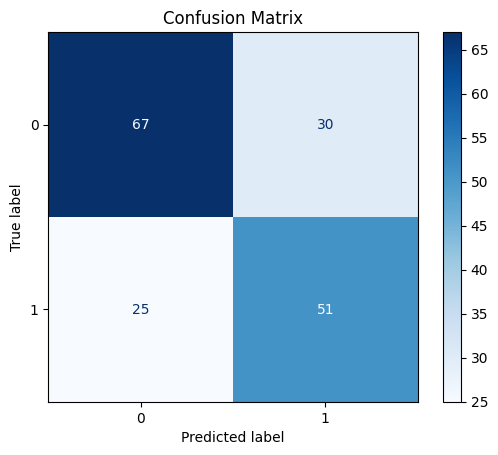

Accuracy: 0.6820809248554913
Precision: 0.6296296296296297
Recall: 0.6710526315789473
F1 Score: 0.6496815286624203


In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#Scaler_X = StandardScaler()
#X_train = Scaler_X.fit_transform(X_train)
#X_test = Scaler_X.transform(X_test) 

model_RF=RandomForestClassifier(max_depth= 10, min_samples_split=3, n_estimators= 200)
model_RF.fit(X_train,y_train)
y_pred_RF = model_RF.predict(X_test)
y_pred_porb_RF=model_RF.predict_proba(X_test)


cm = confusion_matrix(y_test, y_pred_RF)
labels = np.unique(y)
display_labels = [str(label) for label in labels]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_RF)
precision = precision_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)
f1 = f1_score(y_test, y_pred_RF)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

### LightGBM

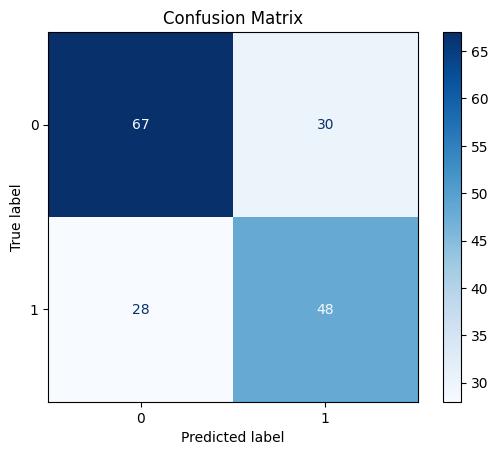

Accuracy: 0.6647398843930635
Precision: 0.6153846153846154
Recall: 0.631578947368421
F1 Score: 0.6233766233766234


In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test) 

model_lgb=lgb.LGBMClassifier(colsample_bytree= 1.0, learning_rate= 0.01, max_depth= 7, n_estimators= 100, subsample= 0.8)
model_lgb.fit(X_train,y_train)
y_pred = model_lgb.predict(X_test)
y_pred_prob_lgb = model_lgb.predict_proba(X_test)



cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)
display_labels = [str(label) for label in labels]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

### XGBOOST

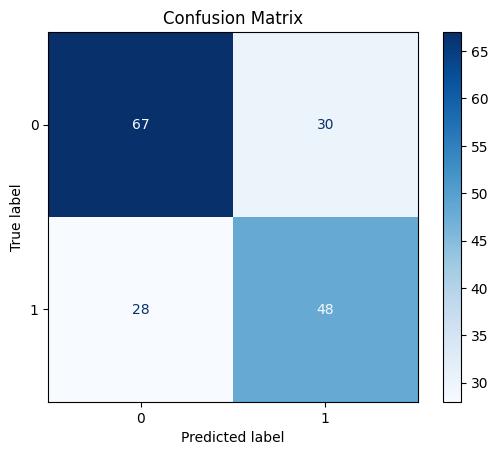

Accuracy: 0.6647398843930635
Precision: 0.6153846153846154
Recall: 0.631578947368421
F1 Score: 0.6233766233766234


In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test) 

modelXG=XGBClassifier(learning_rate= 0.03)
modelXG.fit(X_train,y_train)
y_pred = modelXG.predict(X_test)
y_pred_porb_XG=modelXG.predict_proba(X_test)


cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)
display_labels = [str(label) for label in labels]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [113]:
correlation_matrix = X.corr()

# Get the absolute correlation values and filter based on the threshold (0.6)
correlation_threshold = 0.7
high_correlation_features = correlation_matrix[abs(correlation_matrix) > correlation_threshold]

# Create a set to store the feature pairs with high correlation
selected_features = set()

# Iterate through the correlation matrix and extract the feature pairs with high correlation
for column in high_correlation_features:
    correlated_features = high_correlation_features[column][high_correlation_features[column].notnull()].index
    selected_features.update(set([(column, feature) for feature in correlated_features]))

# Display the selected features
print("Features with correlation greater than 0.6:")
for feature_pair in selected_features:
    print(feature_pair

SyntaxError: incomplete input (1010751621.py, line 18)

In [68]:
correlation_matrix = X.corr()

# Set a threshold for correlation (you can adjust this threshold as needed)
correlation_threshold = 0.7

# Create a mask for highly correlated columns
correlation_mask = (correlation_matrix.abs() >= correlation_threshold) & (correlation_matrix.abs() < 1.0)

# Create a list of columns to drop
columns_to_drop = []

# Iterate through the columns
for column in correlation_mask.columns:
    correlated_columns = correlation_mask.index[correlation_mask[column]].tolist()
    for correlated_column in correlated_columns:
        if correlated_column != column and correlated_column not in columns_to_drop:
            columns_to_drop.append(correlated_column)

# Drop the highly correlated columns from the DataFrame
X = X.drop(columns=columns_to_drop)

# Print the filtered DataFrame
print(X)

     S1  S2  S3  S7  S8  S11  J14  SAMPLE 
0    56  70  55  64  50   70    2    12703
1    56  60  62  64  56   68    4    12703
2    50  58  57  74  50   60    4    12703
3    50  68  42  71  76   65    9    12703
4    50  60  46  83  47   45    8    12703
..   ..  ..  ..  ..  ..  ...  ...      ...
856  50  58  49  48  44   55    5    12709
857  53  76  64  62  59   55    7    12709
858  63  78  64  95  97   58   10    12709
859  50  60  49  60  56   40    3    12709
860  36  66  48  74  73   75    6    12709

[861 rows x 8 columns]


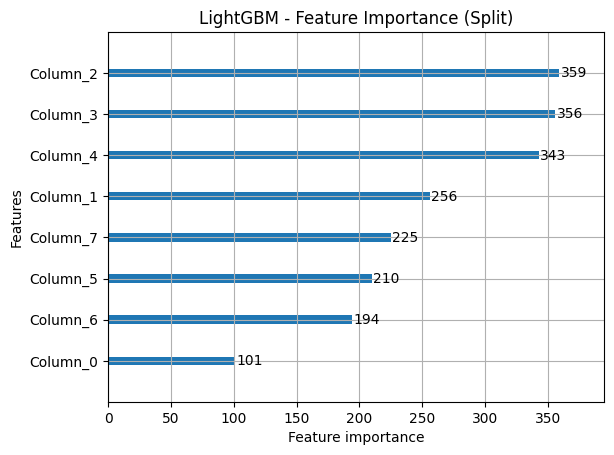

In [84]:
lgb.plot_importance(model_lgb, max_num_features=10, importance_type='split')
plt.title("LightGBM - Feature Importance (Split)")
plt.show()

In [103]:
import tensorflow as tf
from tensorflow import keras

In [168]:
# Load your dataset here, assuming X contains features and y contains labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
dl_predictions = model.predict(X_test)


Epoch 1/8
18/18 [==============================] - 1s 9ms/step - loss: 9.0194 - accuracy: 0.4618 - val_loss: 1.8572 - val_accuracy: 0.4638
Epoch 2/8
18/18 [==============================] - 0s 3ms/step - loss: 1.9445 - accuracy: 0.4818 - val_loss: 1.1422 - val_accuracy: 0.5580
Epoch 3/8
18/18 [==============================] - 0s 3ms/step - loss: 1.0392 - accuracy: 0.5200 - val_loss: 0.8568 - val_accuracy: 0.5000
Epoch 4/8
18/18 [==============================] - 0s 3ms/step - loss: 0.7848 - accuracy: 0.5745 - val_loss: 0.7628 - val_accuracy: 0.5290
Epoch 5/8
18/18 [==============================] - 0s 3ms/step - loss: 0.7235 - accuracy: 0.5964 - val_loss: 0.7362 - val_accuracy: 0.5435
Epoch 6/8
18/18 [==============================] - 0s 4ms/step - loss: 0.7519 - accuracy: 0.5545 - val_loss: 0.9166 - val_accuracy: 0.5290
Epoch 7/8
18/18 [==============================] - 0s 6ms/step - loss: 0.7178 - accuracy: 0.5782 - val_loss: 0.7244 - val_accuracy: 0.5942
Epoch 8/8
6/6 [============

1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 1ms/step


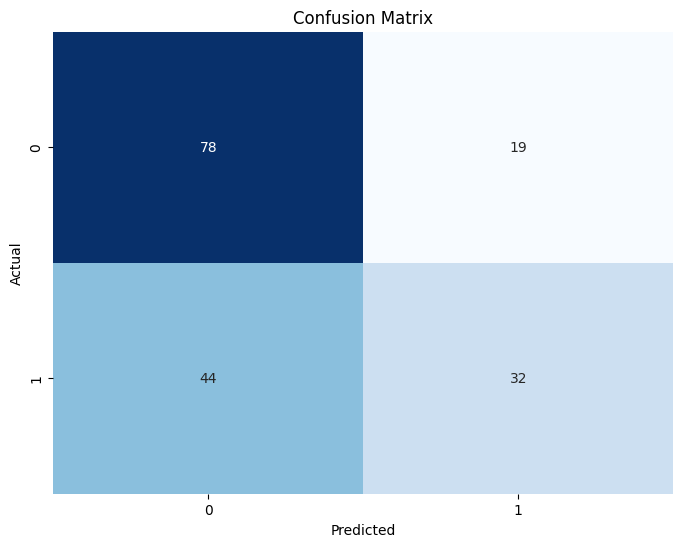

Accuracy: 0.6358381502890174
Precision: 0.6274509803921569
Recall: 0.42105263157894735
F1 Score: 0.5039370078740157


In [169]:
# Make predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



<BarContainer object of 5 artists>

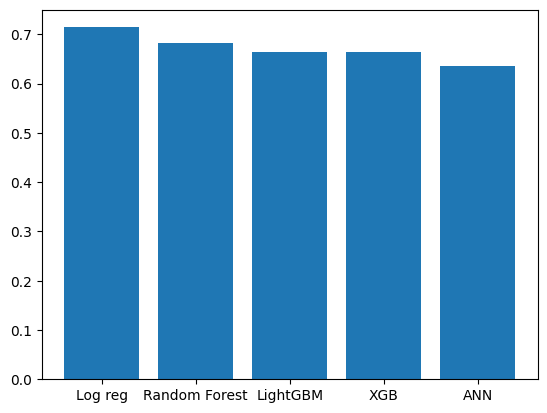

In [173]:
model=['Log reg','Random Forest','LightGBM','XGB','ANN']
Accuracy=[0.71428,0.6820,0.66473,0.66473,0.63583]

plt.bar(model,Accuracy)